## Importing Libraries

In [619]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score

## Reading the Dataset

In [620]:
dataset=pd.read_csv('framingham.csv') # Reading and converting the data into a pandas dataframe
dataset.shape # Calculating the dimensions of the dataset

(4240, 16)

In [621]:
dataset.head(15)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


- This shows an overview of the Columns, non-null count and the data types of the dataset

In [622]:
dataset.info()
#info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Attributes:

- Demographic Division:
    - sex: male(0) or female(1) - Categorical Feature
    - age: age of the individual - Continuous Numerical Feature
    - Education: 4 levels of education - Categorical Feature

- Behavioral Division:
    - currentSmoker: if an individual is a current smoker or not - Categorical Feature
    - cigsPerDay: the number of cigarettes that the person smoked on average in one day - Continuous Numerical Feature

- Medical Information:
    - BPMeds: if the person was on blood pressure medication or not - Categorical Feature
    - prevalentStroke: if the person had a previous stroke history or not - Categorical Feature
    - prevalentHyp: if the person was hypertensive or not - Categorical Feature
    - diabetes: if the person had diabetes or not - Categorical Feature
    - totChol: total cholesterol level - Continuous Numerical Feature
    - sysBP: systolic blood pressure - Continuous Numerical Feature
    - diaBP: diastolic blood pressure - Continuous Numerical Feature
    - BMI: Body Mass Index - Continuous Numerical Feature
    - heartRate: heart rate - Numerical Feature
    - glucose: glucose level - Continuous Numerical Feature
    
- Target variable (To be predicted by the model)
    - 10 year risk of coronary heart disease CHD: binary: 1 = CAD present and 0 = CAD not present

## Data inspection and cleaning

In [623]:
dataset.isnull().sum().sort_values(ascending = False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

## Null Values:
- glucose: 388
- education: 105
- BPMeds: 53
- totChol: 50
- cigsPerDay: 29
- BMI: 19
- heartRate: 1

In [624]:
dataset.duplicated().sum()

0

No duplicate values present in the dataset

## Null values handling

Since glucose has 105 null values, we cannot simply drop the records with null values. Because dropping that would cause significant loss of data.

Therefore, to handle these null values, we fill the null spaces with the mode of the currently present records of the glucose feature.

In [625]:
x=dataset["glucose"].mode()
print(x)
print(x[0])

0    75.0
dtype: float64
75.0


In [626]:
#Fill NA/NaN values using the specified method
dataset["glucose"].fillna((dataset["glucose"].mode())[0], inplace=True)

- fillna: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html 

- dropna: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html 

Since the rest of the features have very less percentage of null values (less than 3% of the total records), we have discarded the whole records that contained the null values in any one of their features

In [627]:
# Drop rows which contain missing values.
dataset.dropna(inplace=True)

In [628]:
# Checking: No null values present now
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [629]:
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Detecting Removable Outliers and removig them:

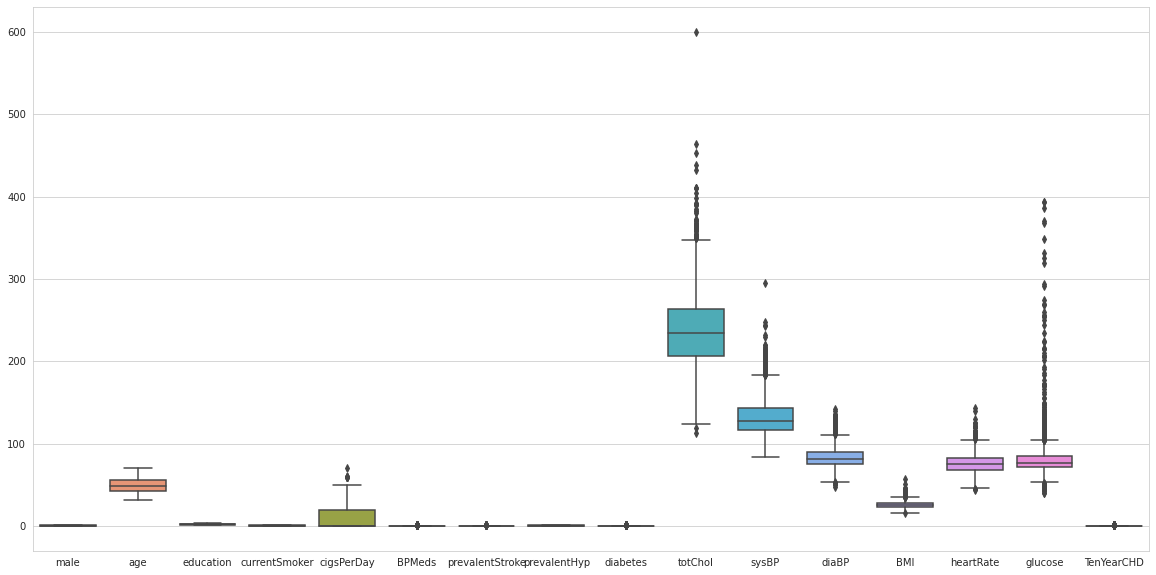

In [630]:
# Box plot to visualize the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=dataset)
plt.show()

totChol and sysBP consist outliers that are removable (one each). So removing those records

In [631]:
totChol_outlier = dataset['totChol'].max()
sysBP_outlier = dataset['sysBP'].max()

print(totChol_outlier)
print(sysBP_outlier)

600.0
295.0


In [632]:
# Dataset shape - Before and After removing the outliers
dataset.shape

(3989, 16)

In [633]:
dataset = dataset[dataset['totChol']<totChol_outlier]
dataset = dataset[dataset['sysBP']<sysBP_outlier]
print(dataset.shape)

(3987, 16)


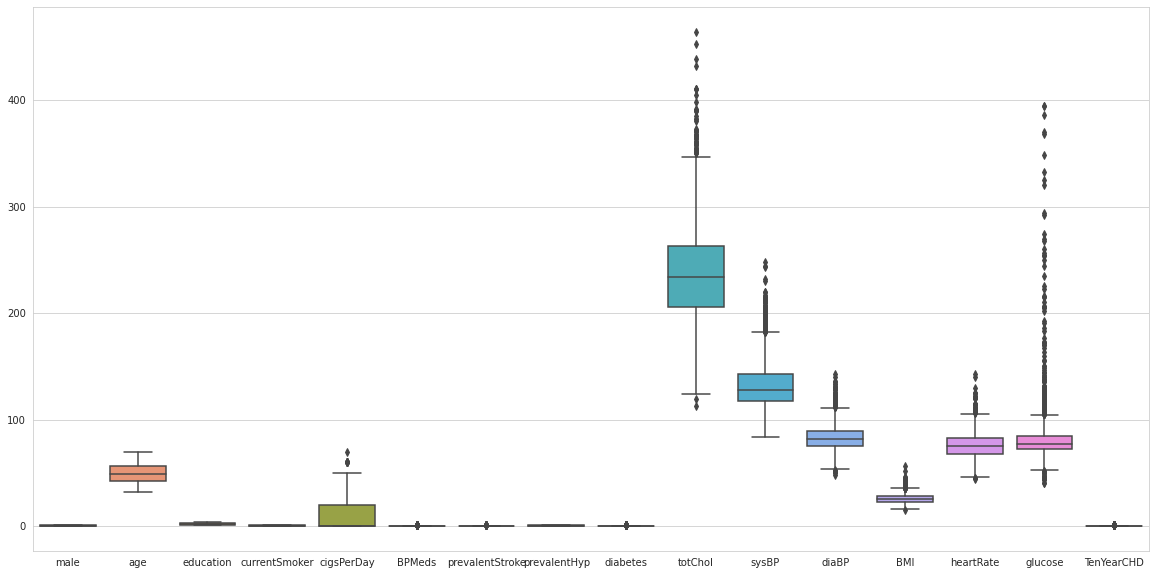

In [634]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=dataset)
plt.show()

- Null & Duplicate values and outliers are handled. So now, moving on to exploratory data analysis

# Exploratory Data Analysis

In [635]:
# Get the summary statistics

dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Summary Statistics & inferences:

- This shows the mean, standard deviation and other statistical metrices of each of the features in the dataset
- This also includes the categorical data of the dataset since they were already converted into discrete numerical values
- The count of records in each feature is same. So there is no missing value in any of the columns.

## Correlation Matrix:

In [636]:
corr_mat=dataset.corr()
corr_mat

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022271,0.012846,0.200413,0.325378,-0.050109,-0.003655,0.008331,0.018317,-0.067404,-0.031767,0.060054,0.080171,-0.115686,0.009070,0.092442
age,-0.022271,1.000000,-0.160758,-0.213310,-0.190319,0.128583,0.045118,0.304031,0.104931,0.271461,0.389472,0.204822,0.133489,-0.008925,0.116007,0.228941
education,0.012846,-0.160758,1.000000,0.018139,0.006329,-0.010156,-0.028592,-0.081164,-0.034995,-0.023309,-0.127374,-0.062408,-0.135678,-0.057808,-0.031328,-0.053684
currentSmoker,0.200413,-0.213310,0.018139,1.000000,0.770796,-0.049012,-0.032574,-0.105110,-0.038933,-0.047181,-0.129719,-0.108840,-0.164294,0.052682,-0.051469,0.023450
cigsPerDay,0.325378,-0.190319,0.006329,0.770796,1.000000,-0.044054,-0.033985,-0.066410,-0.035235,-0.024983,-0.086929,-0.050388,-0.087239,0.068342,-0.050903,0.060126
BPMeds,-0.050109,0.128583,-0.010156,-0.049012,-0.044054,1.000000,0.127479,0.259859,0.048140,0.087307,0.262652,0.196724,0.103322,0.016391,0.054397,0.090205
prevalentStroke,-0.003655,0.045118,-0.028592,-0.032574,-0.033985,0.127479,1.000000,0.067370,0.009705,0.008219,0.055719,0.049504,0.031511,-0.012082,0.016523,0.044988
prevalentHyp,0.008331,0.304031,-0.081164,-0.105110,-0.066410,0.259859,0.067370,1.000000,0.073136,0.163205,0.695979,0.615394,0.303619,0.150751,0.083679,0.174795
diabetes,0.018317,0.104931,-0.034995,-0.038933,-0.035235,0.048140,0.009705,0.073136,1.000000,0.032146,0.100603,0.050340,0.082461,0.051506,0.608596,0.086217
totChol,-0.067404,0.271461,-0.023309,-0.047181,-0.024983,0.087307,0.008219,0.163205,0.032146,1.000000,0.214626,0.171085,0.122846,0.088668,0.044419,0.078166


Text(0.5, 1.0, 'Correlation Matrix')

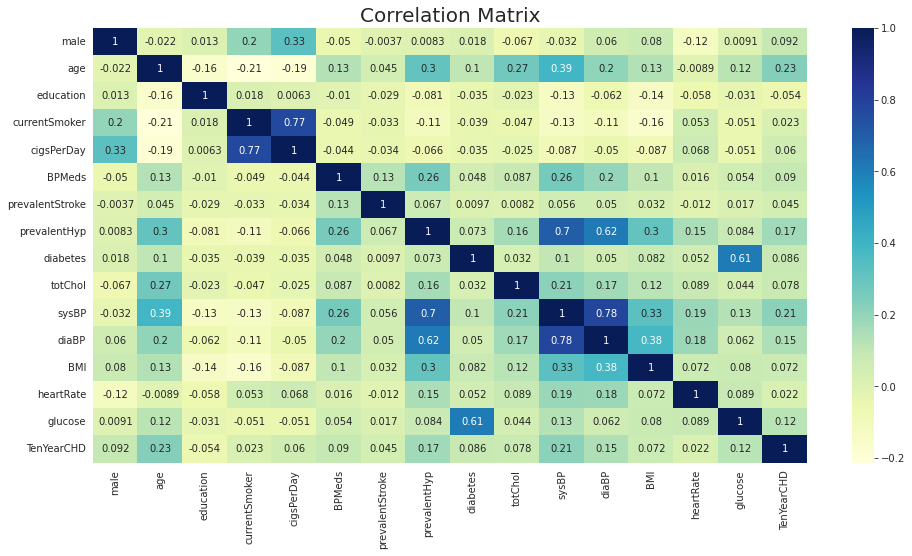

In [637]:
# Heatmap plots rectangular data as a color-encoded matrix.
plt.figure(figsize=(16,8), facecolor='w')
sns.heatmap(corr_mat,xticklabels=corr_mat.columns,yticklabels=corr_mat.columns,annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix", size=20)

- Inference from the Correlation Matrix:-

    - Highly correlated pairs: 
        - sysBP & diaBP -- 0.78
        - cigsPerDay & currentSmoker (obvious) -- 0.77
        - sysBP & prevalentHyp -- 0.7
        - diaBP & prevalentHyp -- 0.62
        - glucose & diabetes -- 0.61

        - age & sysBP (little bit) -- 0.39

- High education, less CHD


UNDERSTANDING CORRELATION MATRIX:
- Used in complex situations where we cannot very easily figure out the significance of input variables on the output
- A high correlation value between a dependent variable and an independent variable indicates that the independent variable is of very high significance in determining the output.
- More features do not always imply better accuracy. More features may lead to a decline in the accuracy if they contain any irrelevant features creating unrequired noise in our model.
- We need more independent features because if the features are dependent, it will increase the redundancy in the data.
- Any 2 independent variables are considered to be redundant if they are highly correlated. This causes unnecessary time and space wastage. Even the redundancy between 2 variables can be found using correlation.
 
    
- REFERENCE: https://towardsdatascience.com/understanding-feature-extraction-using-correlation-matrix-and-scatter-plots-6c19e968a60c


<font color='red'>
    
PRACTICALLY: 
diaBP is a more significant measure than sysBP

## 1) Univariate Analysis

- Feature-wise Analysis
- For univariate analysis, we have divided the features into 2 different types: 1. NUMERICAL FEATURES and 2. CATEGORICAL FEATURES. And further analysed them according to which type they fall into
- Numerical data involves features that are only composed of numbers, such as integers or floating-point values. Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set.

## NUMERICAL FEATURES:

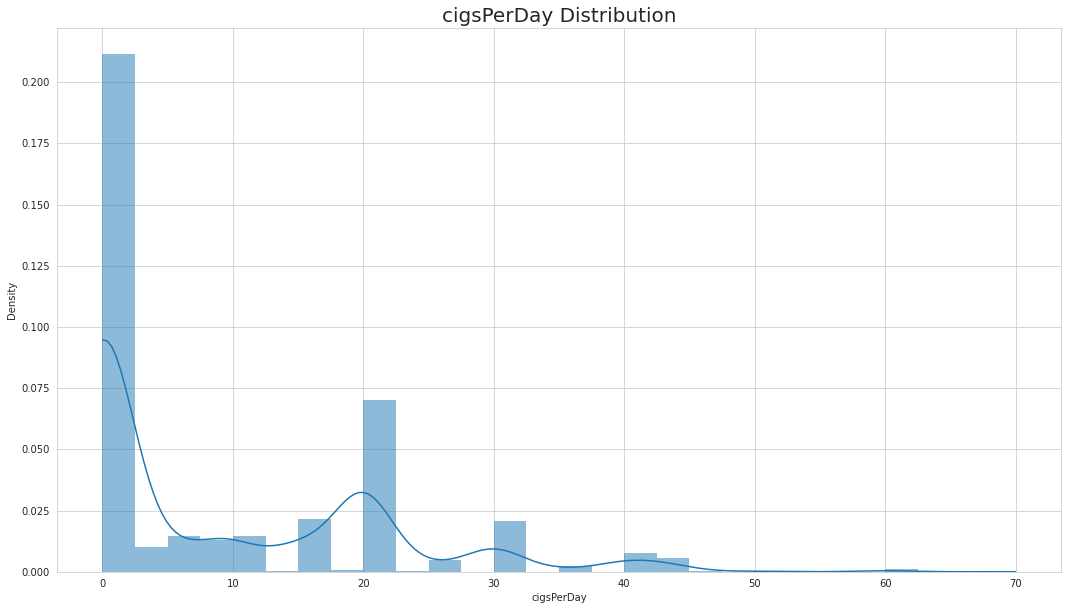

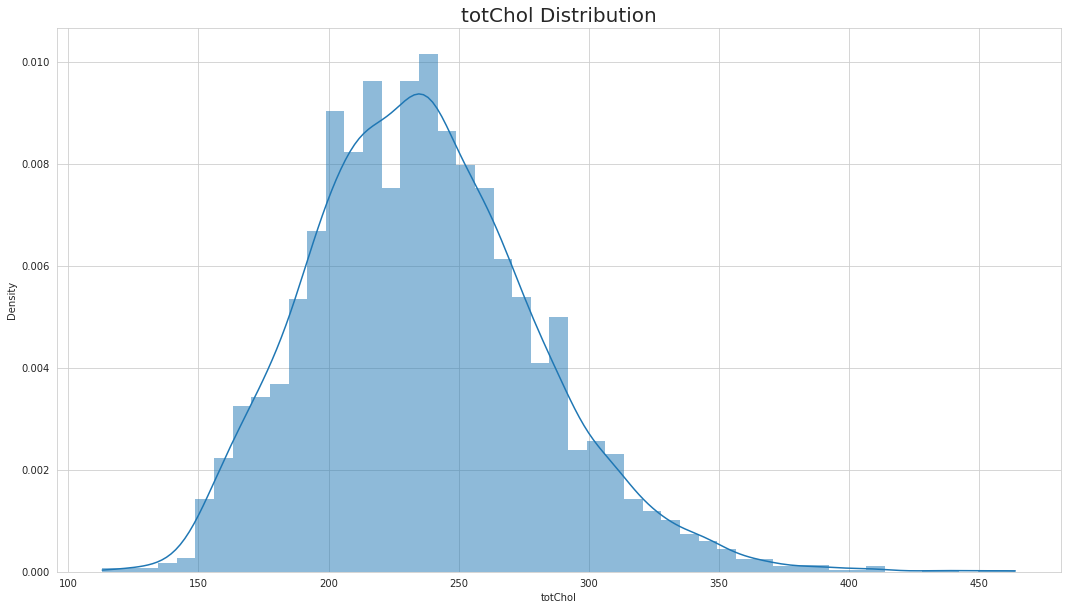

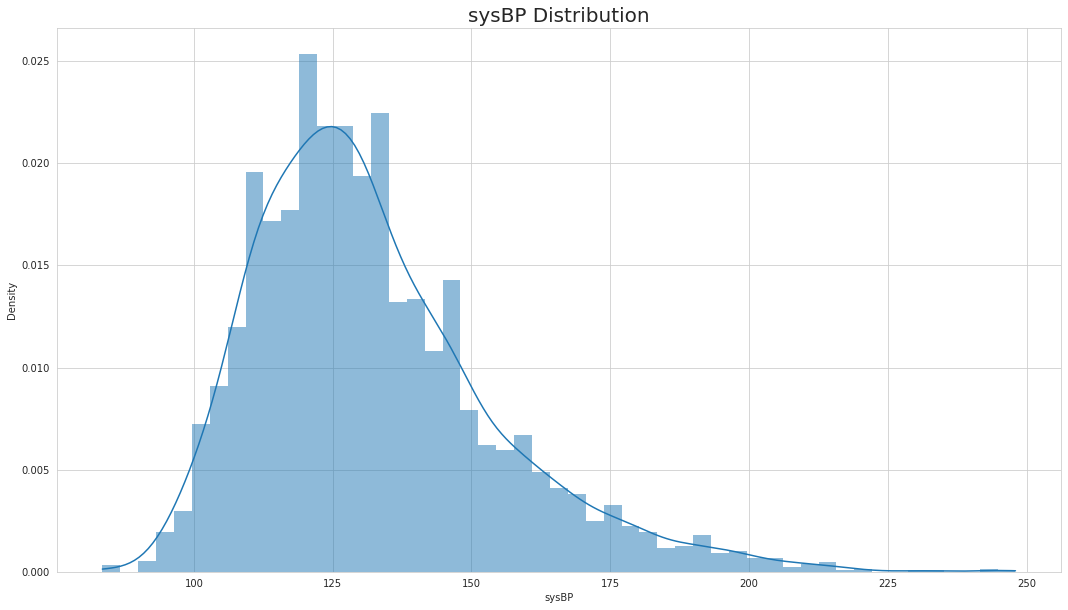

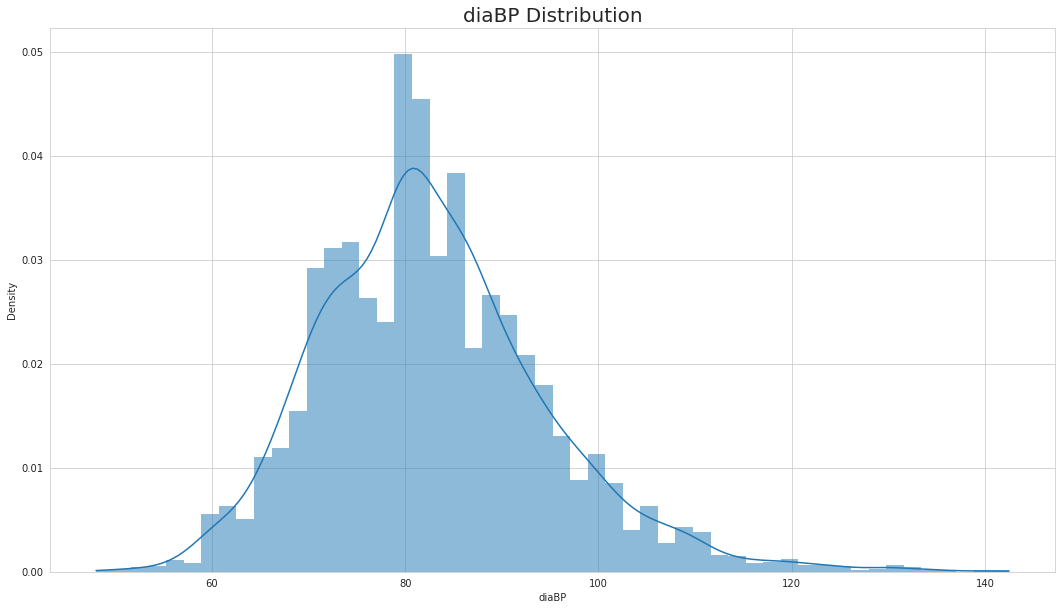

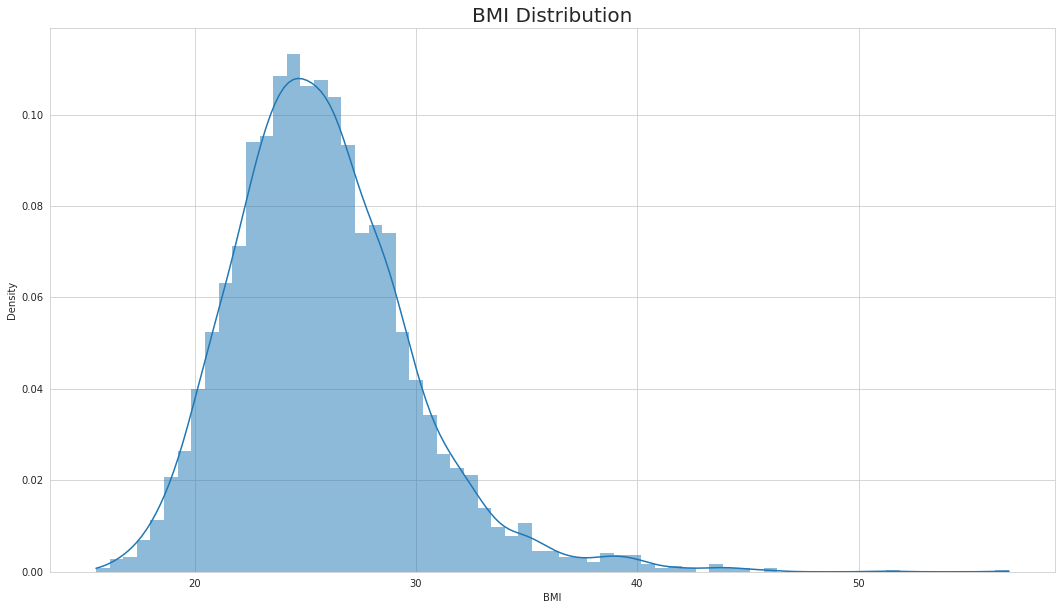

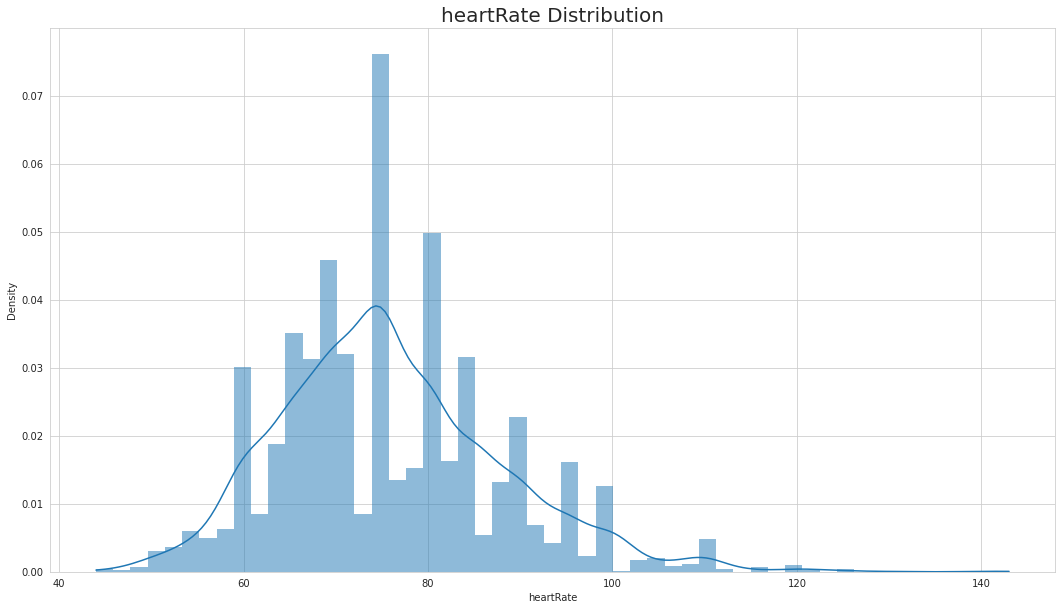

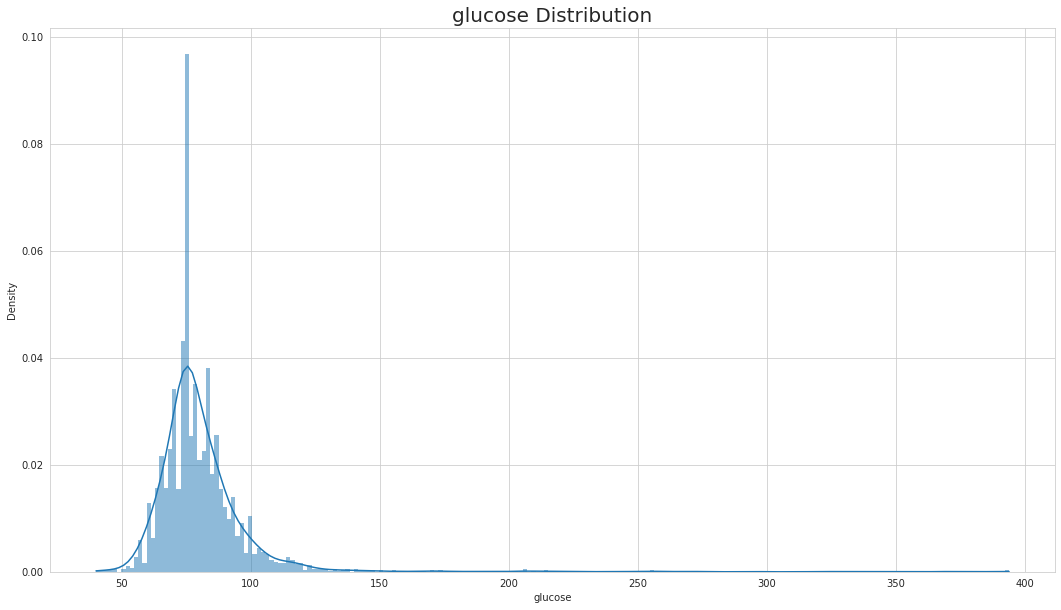

In [638]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.histplot(dataset[feature],kde=True, stat="density", linewidth=0)
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

- BMI, glucose distribution, and totalChol are -- Gaussian/Nearly Gaussian.
    
- BENEFIT OF GAUSSIAN: Parameters mean and variance are easy to interpret, sum of independent random variables will be Gaussian (central limit theorem) making a good choice for modeling noise, simple mathematical form.

- totChol, sysBP, diaBP and BMI has a nearly uniform distribution and the rest are unevenly distributed

- NOW, VIOLIN PLOTS:

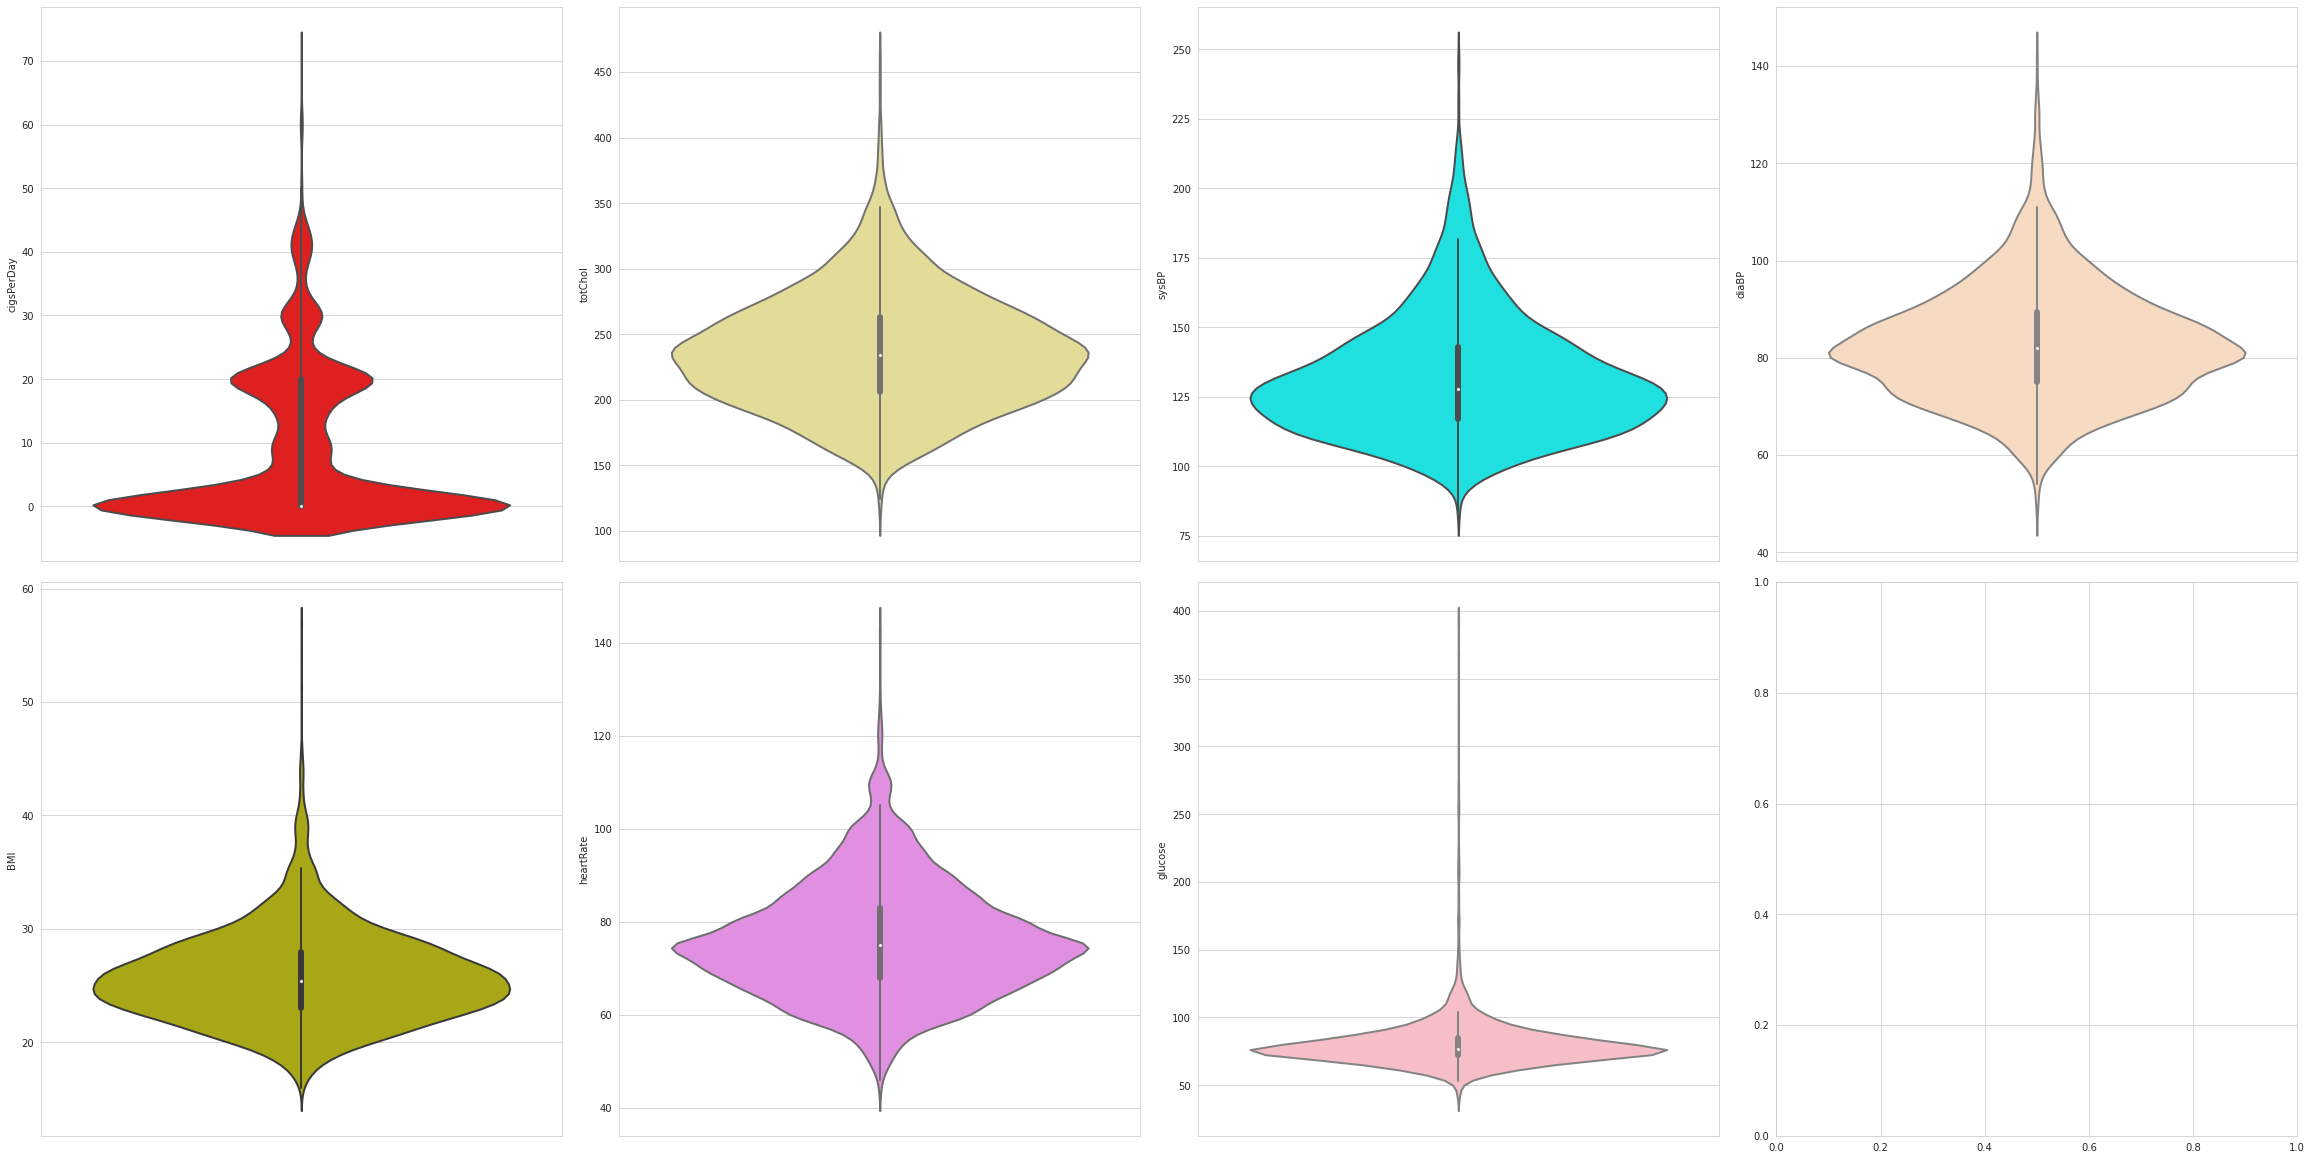

In [639]:
num_plots = len(numeric_features)
total_cols = 4
total_rows = num_plots//total_cols + 1
colors = ['red', 'khaki', 'aqua', 'peachpuff', 'y', 'violet', 'lightpink']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(8*total_cols, 8*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=dataset, ax=axs[row][pos], linewidth=2, color=colors[i])

ABOUT VIOLIN PLOTS:

1) to understand the distribution of data

2) white dot = median, bold line in the middle=interquartile range, straight line=95% confidence range, density plot width=frequency

INFERENCE FROM THE VIOLIN PLOT: IN WHAT RANGE THE DATA FOR EACH FEATURE LIE:

- cigsPerDay has uneven distribution although most of the data is concentrated on 0 -- BETWEEN 0 TO 50

The majority portions of the following columns lie in the range:
- totChol: 150 to 300 -- BETWEEN 130 TO 350
- sysBP: 100 to 150 -- BETWEEN 75 TO 200
- diaBP: 60 to 100 -- BETWEEN 50 TO 110
- BMI: 20 to 30 -- BETWEEN 10 TO 35
- heartRate: 50 to 100 -- BETWEEN 20 TO 100
- glucose: 50 to 150 -- BETWEEN 50 TO 100

## CATEGORICAL FEATURES: 
These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

In [640]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [641]:
for feature in categorical_features:
    print(feature,':')
    print(dataset[feature].value_counts())
    print("-----------------")

male :
0    2259
1    1728
Name: male, dtype: int64
-----------------
education :
1.0    1653
2.0    1209
3.0     666
4.0     459
Name: education, dtype: int64
-----------------
currentSmoker :
0    2028
1    1959
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3965
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2754
1    1233
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3887
1     100
Name: diabetes, dtype: int64
-----------------


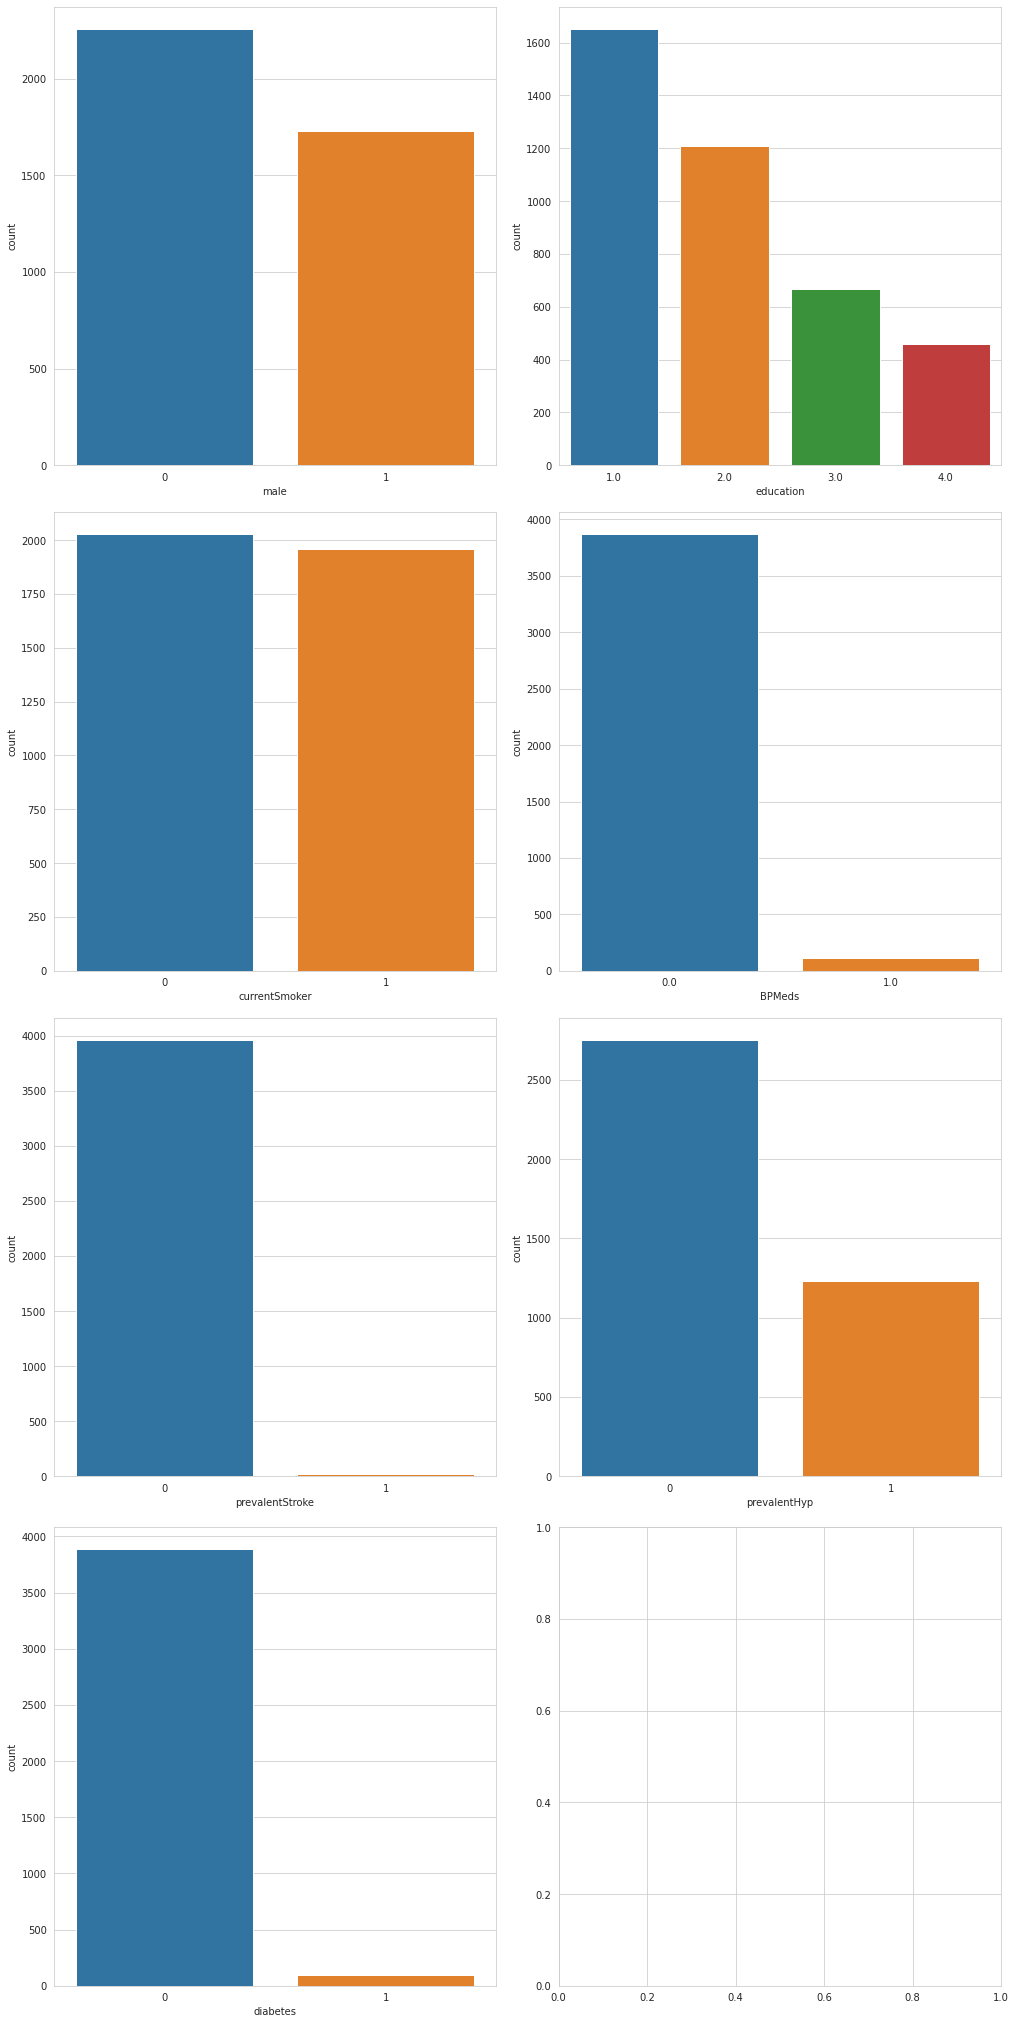

In [642]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos])

- BPmeds, prevalentStroke and diabetes are highly imbalanced.
- There are four levels of education whereas the rest categorical features are all binary
- The number of Smokers and non-Smokers in currentSmoker is almost the same

## Actual output distribution

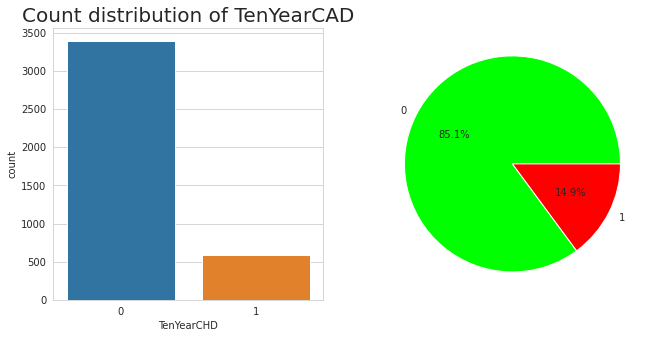

In [643]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(6, 5), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=dataset)
plt.title("Count distribution of TenYearCAD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(dataset["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

- The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of

    Reference Link: http://www.chioka.in/class-imbalance-problem/ 

## 2) Bivariate Analysis

- Pairplots are difficult when data is higher dimensional and there are a lot of records
- So selective pairwise feature analysis

1) Relationship between education and cigsPerDay

In [644]:
#Grouping education and cigsPerDay

graph_1 = dataset.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text major ticklabel objects>)

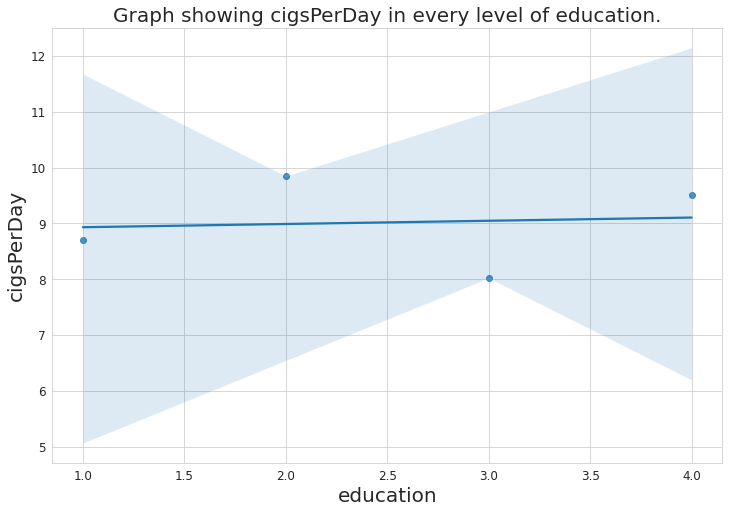

In [645]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- There is no linear relationship observed.
- Level 3 education shows the lowest mean.

2) Which gender has more risk of coronary heart disease CHD

In [646]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = dataset.groupby("male", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

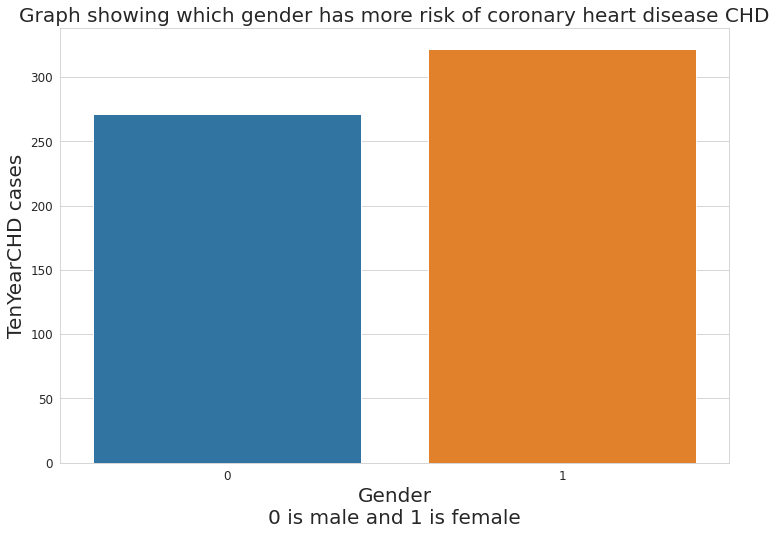

In [647]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is male and 1 is female",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD

3) Which age group has more smokers?

Text(0, 0.5, 'age Count')

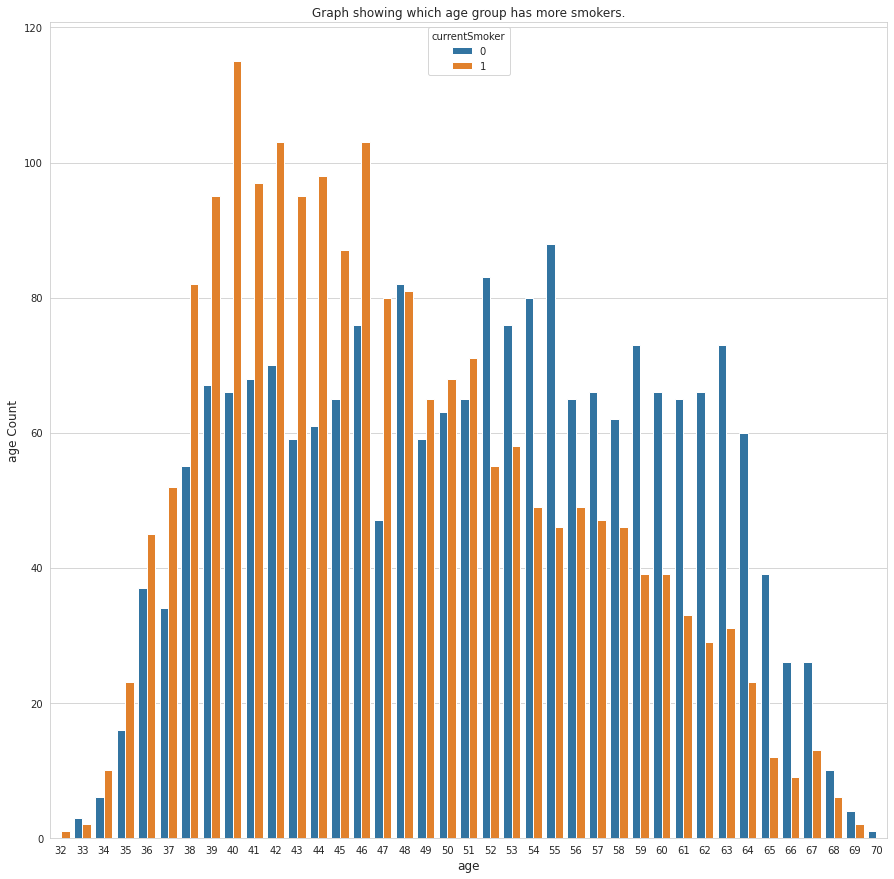

In [648]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(15,15), facecolor='w')
sns.countplot(x="age",data=dataset,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=12)
plt.xlabel("age", size=12)
plt.ylabel("age Count", size=12)
#plt.xticks(size=12)
#plt.yticks(size=12)

- Mid-age groups ranging from the age of 38 - 48 have more number of currentSmokers
- No currentSmokers observed below the age of 32
- maximum age for a currentSmokers is 70

4) Relation between cigsPerDay and risk of coronary heart disease

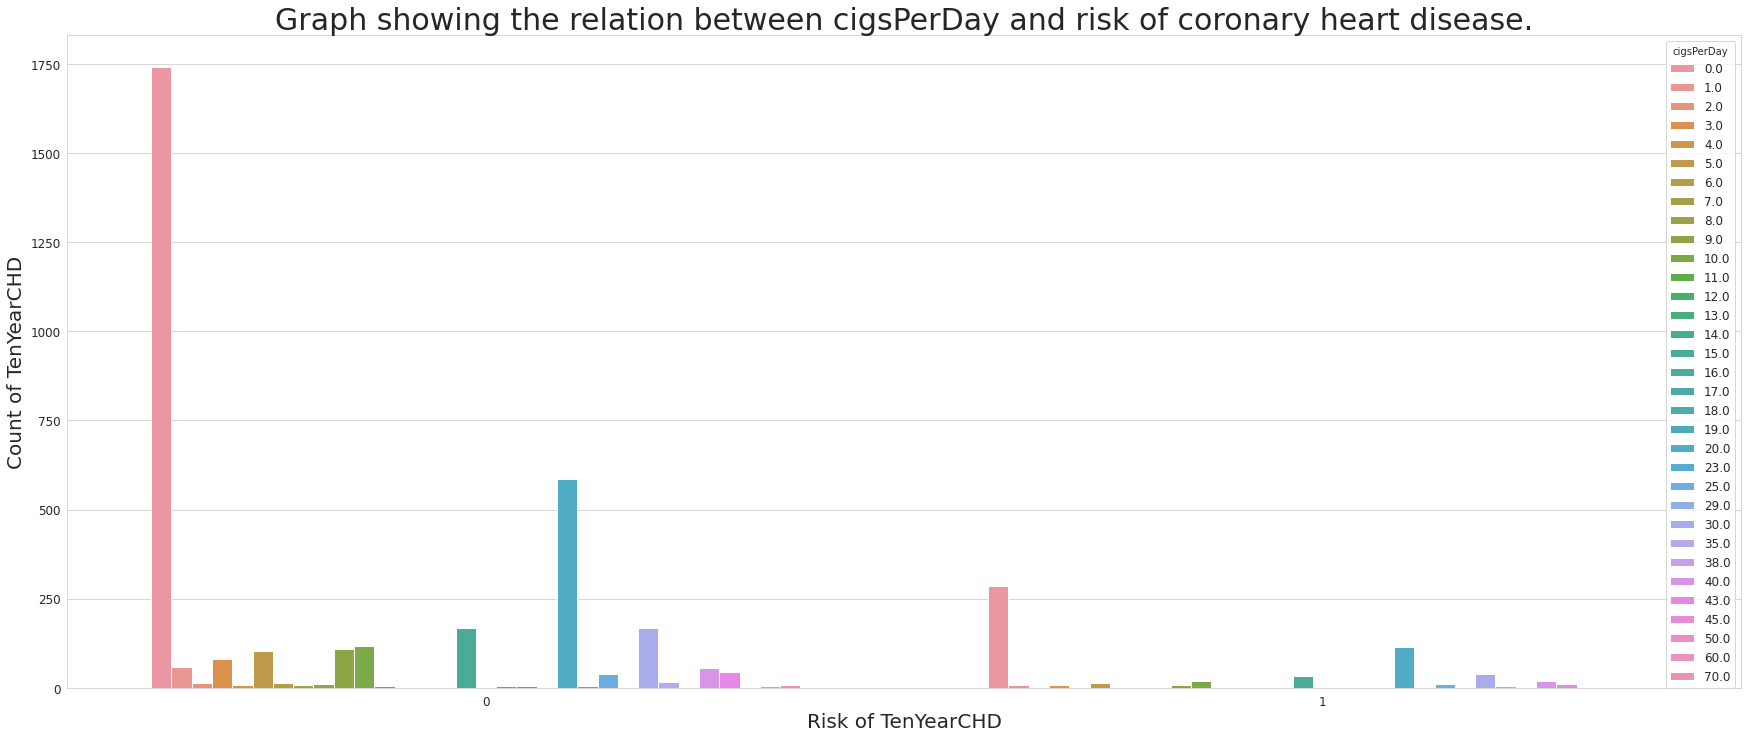

In [649]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=dataset,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


- Low cigsPerDay comes with lower risk of CHD.
- Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
- Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

In [650]:
max=dataset['cigsPerDay'].max()
min=dataset['cigsPerDay'].min()
mean=dataset['cigsPerDay'].mean()
print(max)
print(min)
print(mean)

70.0
0.0
9.027840481565086


5) Relation between sysBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

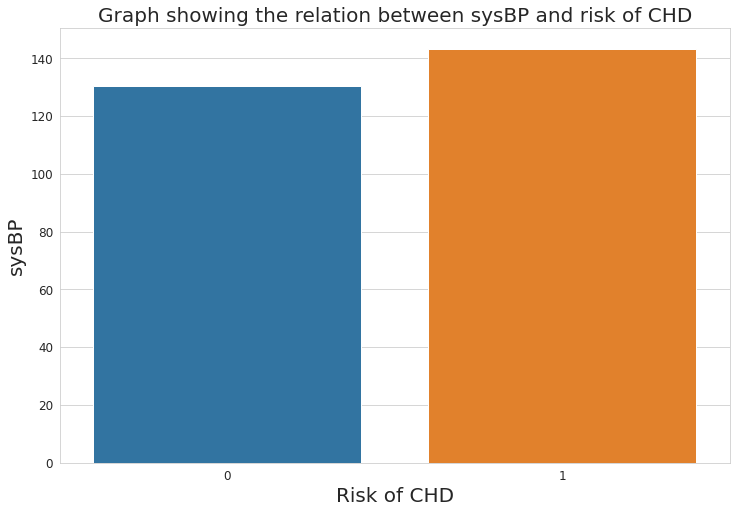

In [651]:
# Grouping up the data and ploting it

graph_3 = dataset.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

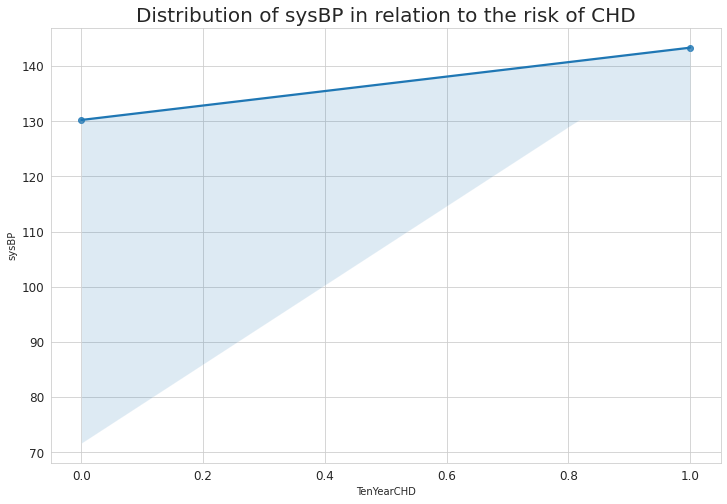

In [652]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Minor relation of higher risk of TenYearCHD found with higher sysBP
- Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease

6) Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

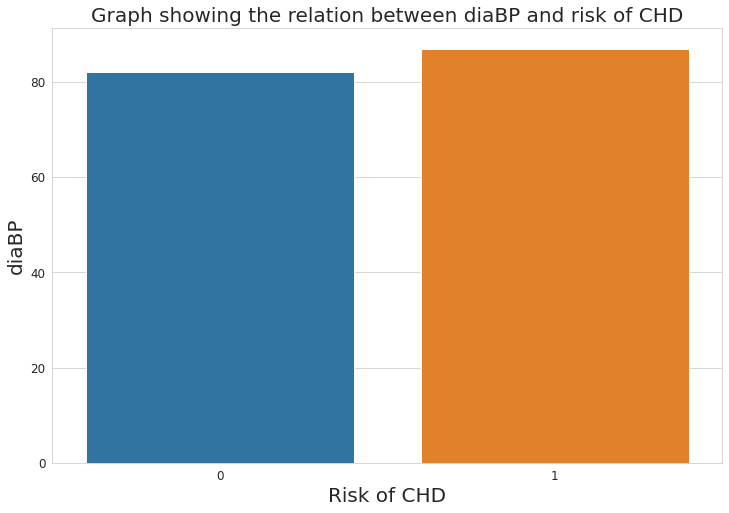

In [653]:
# Grouping up the data and ploting it

graph_4 = dataset.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

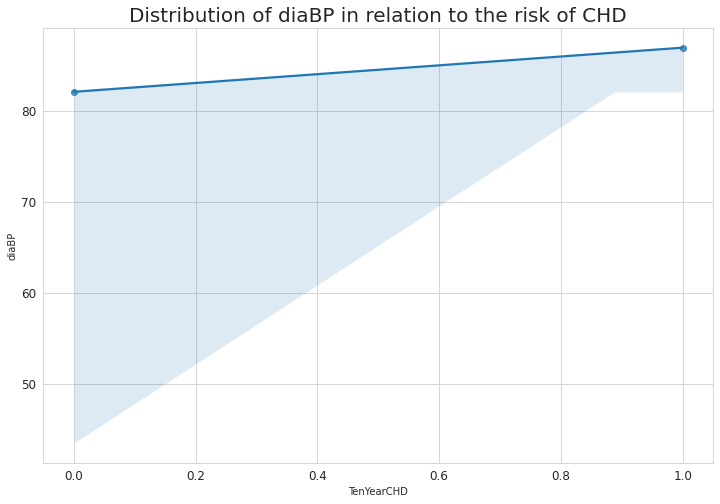

In [654]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one
- Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

7) Relation between age and totChol

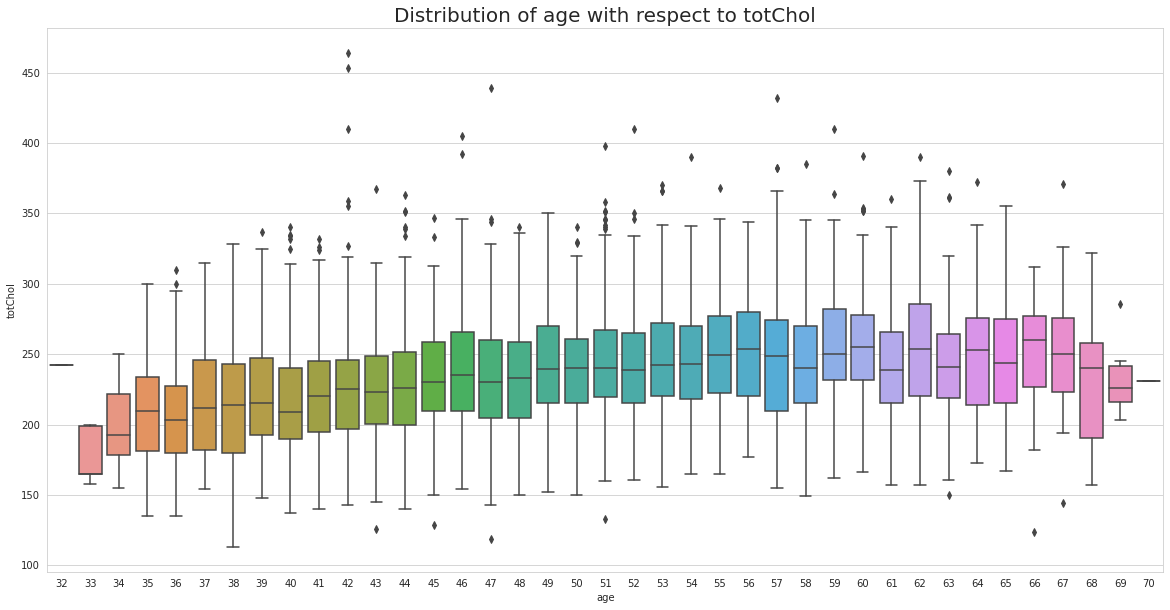

In [655]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=dataset)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

- The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

## 3) Multivariate Analysis

1) Relationship between age and cigsPerDay, totChol, glucose

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

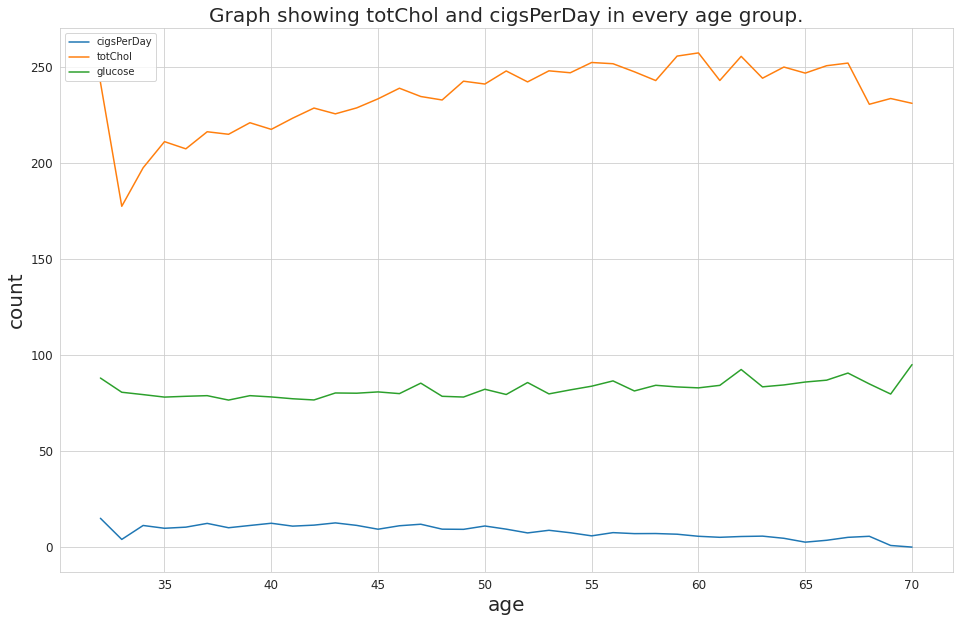

In [656]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = dataset.groupby("age").cigsPerDay.mean()
graph_6 = dataset.groupby("age").totChol.mean()
graph_7 = dataset.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

- There is a minor relation between totChol and glucose.
- totChol has a steep, linear and inverse graph for lower ranges of age
- cigsPerDay has a fairly parallel relationship with age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


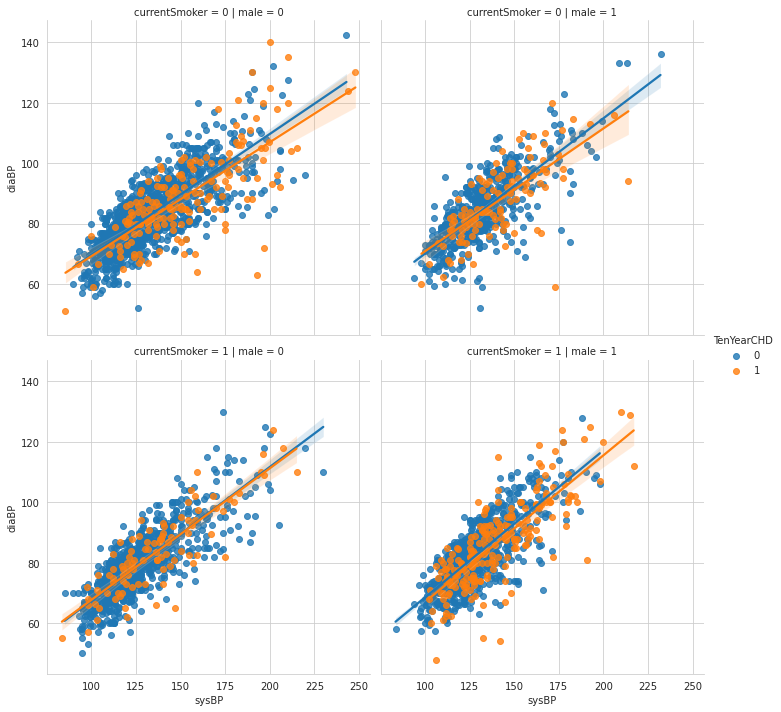

In [657]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=dataset,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

#The lmplot plot shows the line along with datapoints on the 2d space. By specifying x and y you can set the horizontal and vertical labels repsectively.

- The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

## Resampling imbalanced dataset by oversampling positive cases

In [658]:
dataset['TenYearCHD'].value_counts()

0    3394
1     593
Name: TenYearCHD, dtype: int64

In [659]:
target1=dataset[dataset['TenYearCHD']==1]
target0=dataset[dataset['TenYearCHD']==0]

In [660]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html 

In [661]:
target=pd.concat([target0,target1])

In [662]:
target['TenYearCHD'].value_counts()

0    3394
1    3394
Name: TenYearCHD, dtype: int64

In [663]:
dataset=target
np.shape(dataset)

(6788, 16)

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting:

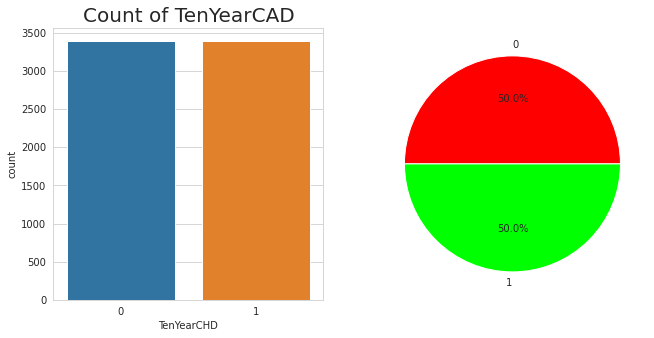

In [664]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(6, 5), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=dataset)
plt.title("Count of TenYearCAD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(dataset["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()


- Oversampling leads to overfitting -- and that's why oversampling is not a good method
- Therefore, we have used SMOTE for balancing the dataset post mid sem

## Feature Selection:

In [665]:
#Identifying input features and output
X=dataset.iloc[:,0:15]
y=dataset.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


-  sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10): Select features according to the k highest scores.
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html 
- We have used chi2(X, y) https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2, which can compute chi-squared stats between each non-negative feature and class.
- Instead we can also try and use ANOVA: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif 
    
    
## Chi-squared stats

In [666]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [667]:
fit=best.fit(X,y)

In [668]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [669]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2121.922128
14       glucose  1232.342416
1            age  1006.482991
4     cigsPerDay   788.788750
9        totChol   769.066248
11         diaBP   486.662514
7   prevalentHyp   221.104823
0           male    66.775610
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.717502


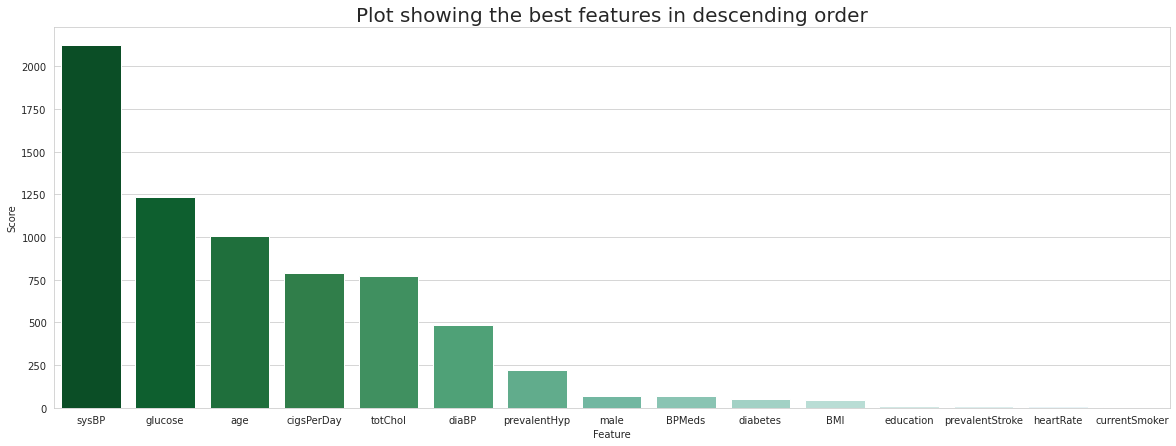

In [670]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [671]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

Only these features have strongest influence over the target variable. They are in the above mentioned particular order

In [672]:
dataset=dataset[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
dataset.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


## Feature Splitting and Scaling

In [673]:
#Dividing the dataset into training and test sub-datasets for predictive modeling

y = dataset['TenYearCHD']
X = dataset.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [674]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Modeling

1) Logistic Regressor

In [675]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model_lr = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[879 473]
 [408 956]]


Accuracy of Logistic Regression: 67.56259204712813 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1352
           1       0.67      0.70      0.68      1364

    accuracy                           0.68      2716
   macro avg       0.68      0.68      0.68      2716
weighted avg       0.68      0.68      0.68      2716



In [676]:
log_accuracy = accuracy_score(test_y,lr_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 67.56%


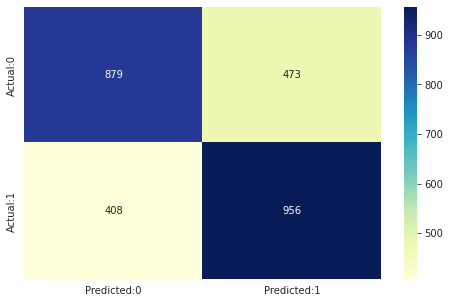

In [677]:
######
cm=confusion_matrix(test_y,lr_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [678]:
####
print(classification_report(test_y,lr_predict))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1352
           1       0.67      0.70      0.68      1364

    accuracy                           0.68      2716
   macro avg       0.68      0.68      0.68      2716
weighted avg       0.68      0.68      0.68      2716



In [679]:
logistic_f1 = f1_score(test_y, lr_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 68.46%


In [680]:
def f2_score(y_true, y_pred):
    # fbeta_score throws a confusing error if inputs are not numpy arrays
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    # We need to use average='samples' here, any other average method will generate bogus results
    return fbeta_score(y_true, y_pred, beta=2, average='binary')


In [681]:
logistic_f2 = f2_score(test_y,lr_predict)
print(logistic_f2)

0.6942628903413217


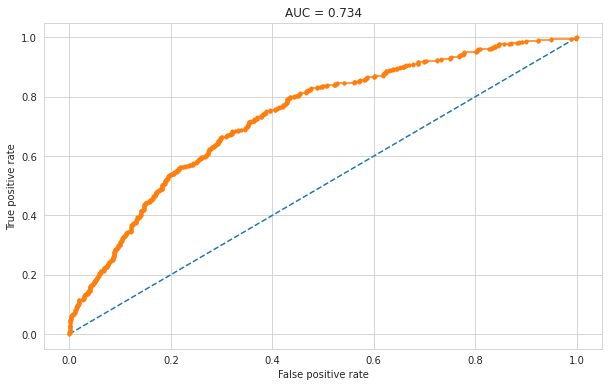

In [682]:
##########
# ROC curve and AUC 
probs = model_lr.predict_proba(test_x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(test_y, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

2) KNN

In [683]:
from sklearn.neighbors import KNeighborsClassifier
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[ 887  465]
 [ 178 1186]]


Accuracy of k-NN Classification: 76.32547864506627 

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1352
           1       0.72      0.87      0.79      1364

    accuracy                           0.76      2716
   macro avg       0.78      0.76      0.76      2716
weighted avg       0.78      0.76      0.76      2716



In [684]:
knn_accuracy = accuracy_score(test_y,knn_predict)
print(f"Using KNN we get an accuracy of {round(knn_accuracy*100,2)}%")

Using KNN we get an accuracy of 76.33%


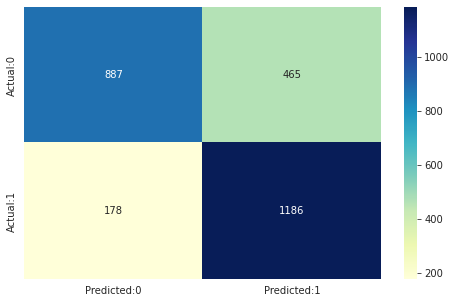

In [685]:
cm=confusion_matrix(test_y,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [686]:
knn_f1 = f1_score(test_y, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 78.67%


In [687]:
def f2_score(y_true, y_pred):
    # fbeta_score throws a confusing error if inputs are not numpy arrays
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    # We need to use average='samples' here, any other average method will generate bogus results
    return fbeta_score(y_true, y_pred, beta=2, average='binary')

knn_f2 = f2_score(test_y, knn_predict)
print(knn_f2)

0.8343886309272548


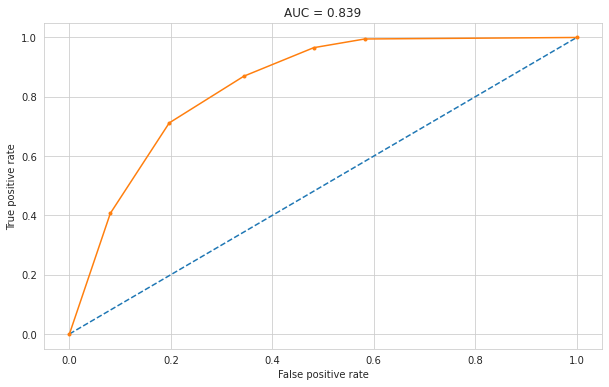

In [688]:
# ROC curve and AUC 
probs = model_knn.predict_proba(test_x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(test_y, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

## Model Evaluation

In [689]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour'], 'Accuracy': [log_accuracy*100, knn_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,67.562592
1,K-Nearest Neighbour,76.325479


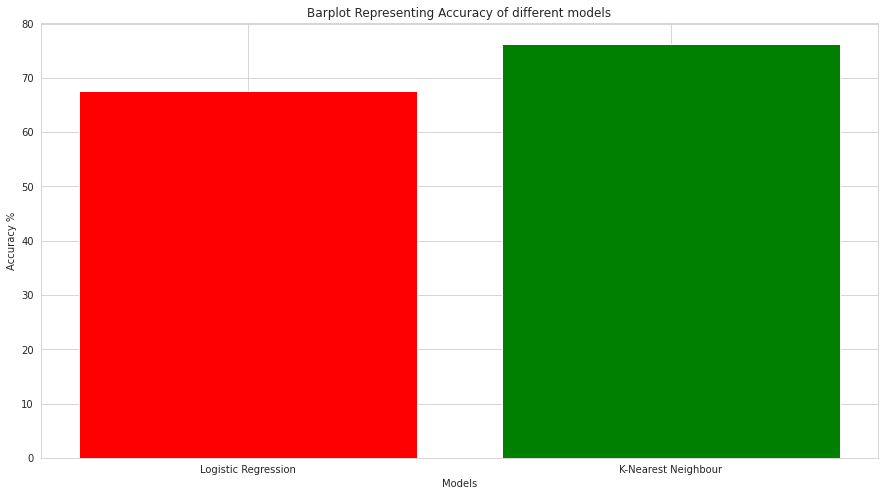

In [690]:
colors = ['red','green']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## COMPARISON


In [691]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1, 'F2 score':logistic_f2},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1, 'F2 score':knn_f2}
}).T

In [692]:
comparison

,Accuracy,AUC,F1 score,F2 score
Logistic regression,0.675626,0.734181,0.684569,0.694263
K-nearest neighbours,0.763255,0.839396,0.786733,0.834389


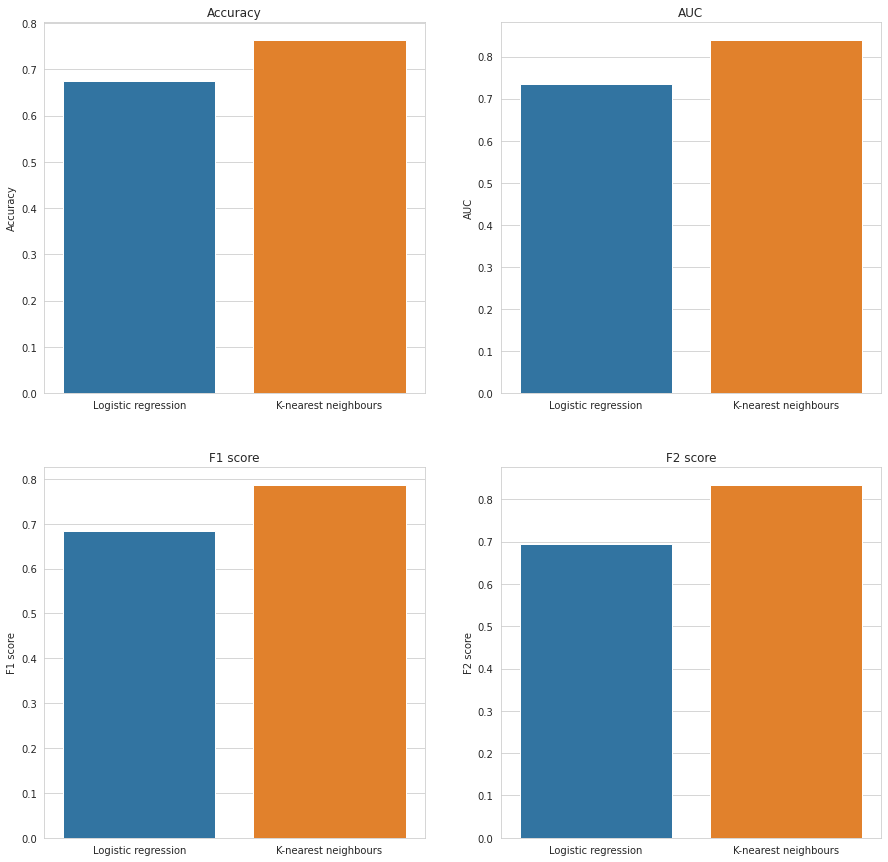

In [693]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','AUC','F1 score','F2 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()  